In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# 2. Load the dataset

In [3]:
Ms = pd.read_csv(r"/content/Mall_Customers.csv")
Ms.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# 3. Perform Below Visualizations

# a) Univariate Analysis


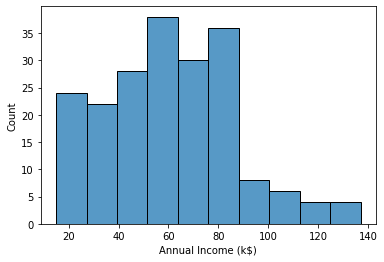

In [9]:
sns.histplot(Ms['Annual Income (k$)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


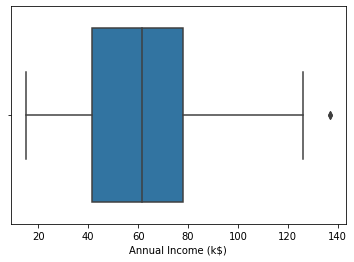

In [10]:
sns.boxplot(Ms['Annual Income (k$)'])

# b) Bi - Variate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


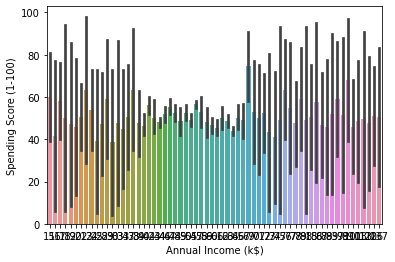

In [11]:
sns.barplot(Ms['Annual Income (k$)'],Ms['Spending Score (1-100)'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


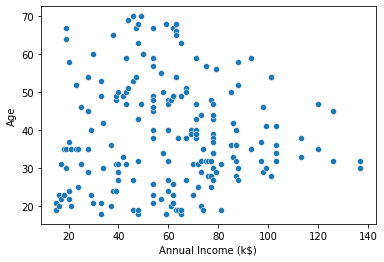

In [12]:
sns.scatterplot(Ms['Annual Income (k$)'],Ms['Age'])

# c)Multi - Variate Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, hue. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


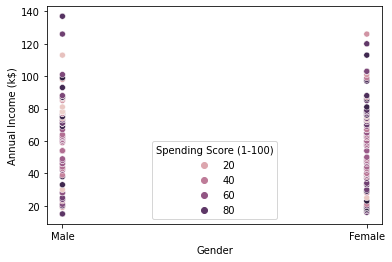

In [13]:
sns.scatterplot(Ms['Gender'],Ms['Annual Income (k$)'],Ms['Spending Score (1-100)'])

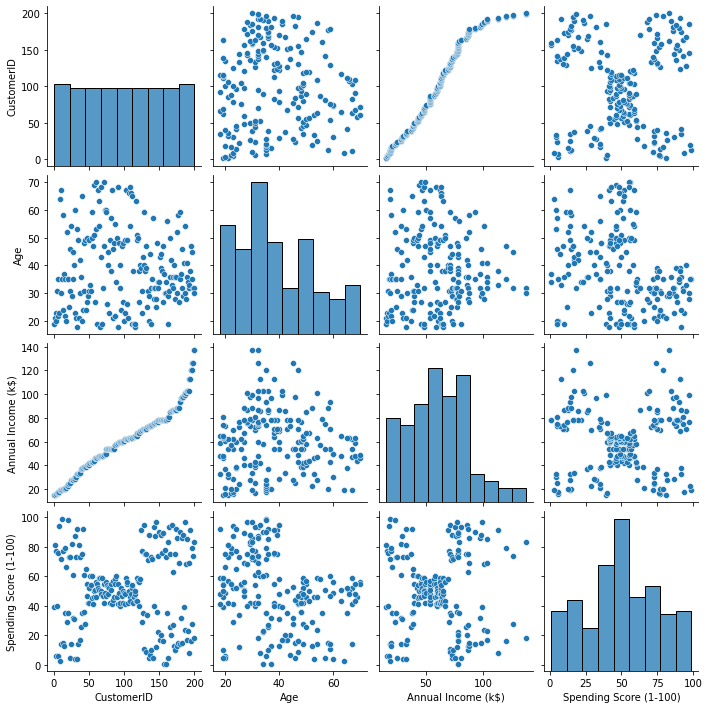

In [14]:
sns.pairplot(Ms)

# 4. Perform descriptive statistics on the dataset

In [15]:
Ms.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [16]:
Ms.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [18]:
Ms.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

In [19]:
Ms.mode()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Female,32.0,54.0,42.0
1,2,NaN,NaN,78.0,NaN
2,3,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN
...,...,...,...,...,...
195,196,NaN,NaN,NaN,NaN
196,197,NaN,NaN,NaN,NaN
197,198,NaN,NaN,NaN,NaN
198,199,NaN,NaN,NaN,NaN


# 5. Check for Missing values and deal with them.


In [20]:
Ms.isnull().any()

CustomerID                False
Gender                    False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

# 6. Find the outliers and replace them outliers

In [22]:
q = Ms.quantile([0.95,0.75])
q

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0.95,190.05,66.05,103.0,92.0
0.75,150.25,49.00,78.0,73.0


In [25]:
iqr = q.iloc[0]-q.iloc[1]
iqr

CustomerID                39.80
Age                       17.05
Annual Income (k$)        25.00
Spending Score (1-100)    19.00
dtype: float64

In [26]:
S = q.iloc[0]+(1.5*iqr)
S

CustomerID                249.750
Age                        91.625
Annual Income (k$)        140.500
Spending Score (1-100)    120.500
dtype: float64

In [27]:
A = q.iloc[1]-(1.5*iqr)
A

CustomerID                90.550
Age                       23.425
Annual Income (k$)        40.500
Spending Score (1-100)    44.500
dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


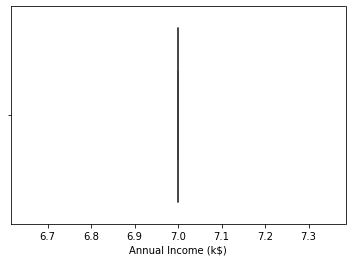

In [28]:
Ms['Annual Income (k$)']=np.where(Ms['Annual Income (k$)']>10,7,Ms['Annual Income (k$)'])
sns.boxplot(Ms['Annual Income (k$)'])

# 7. Check for Categorical columns and perform encoding.

In [30]:
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
L = LabelEncoder()
Ohe=OneHotEncoder()
Ms['Gender']=L.fit_transform(Ms['Gender'])
Ms.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,7,39
1,2,1,21,7,81
2,3,0,20,7,6
3,4,0,23,7,77
4,5,0,31,7,40


# 8. Scaling the data

In [32]:
A = Ms.drop('Spending Score (1-100)',axis=1)
B = Ms['Spending Score (1-100)']
A

,CustomerID,Gender,Age,Annual Income (k$)
0,1,1,19,7
1,2,1,21,7
2,3,0,20,7
3,4,0,23,7
4,5,0,31,7
...,...,...,...,...
195,196,0,35,7
196,197,0,45,7
197,198,1,32,7
198,199,1,32,7


In [33]:
B


0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending Score (1-100), Length: 200, dtype: int64

In [37]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
MM =MinMaxScaler()
A_scale=MM.fit_transform(A)
A_scale

array([[0.        , 1.        , 0.01923077, 0.        ],
       [0.00502513, 1.        , 0.05769231, 0.        ],
       [0.01005025, 0.        , 0.03846154, 0.        ],
       [0.01507538, 0.        , 0.09615385, 0.        ],
       [0.0201005 , 0.        , 0.25      , 0.        ],
       [0.02512563, 0.        , 0.07692308, 0.        ],
       [0.03015075, 0.        , 0.32692308, 0.        ],
       [0.03517588, 0.        , 0.09615385, 0.        ],
       [0.04020101, 1.        , 0.88461538, 0.        ],
       [0.04522613, 0.        , 0.23076923, 0.        ],
       [0.05025126, 1.        , 0.94230769, 0.        ],
       [0.05527638, 0.        , 0.32692308, 0.        ],
       [0.06030151, 0.        , 0.76923077, 0.        ],
       [0.06532663, 0.        , 0.11538462, 0.        ],
       [0.07035176, 1.        , 0.36538462, 0.        ],
       [0.07537688, 1.        , 0.07692308, 0.        ],
       [0.08040201, 0.        , 0.32692308, 0.        ],
       [0.08542714, 1.        ,

# 9. Perform any of the clustering algorithms


In [38]:
from sklearn.cluster import KMeans
KM=KMeans()
cluster=KM.fit_predict(A_scale)
cluster

array([0, 0, 6, 6, 6, 6, 6, 6, 3, 6, 3, 6, 1, 6, 0, 0, 6, 0, 3, 6, 0, 0,
       1, 0, 1, 0, 1, 0, 6, 6, 3, 6, 3, 0, 1, 6, 6, 6, 6, 6, 1, 0, 3, 6,
       1, 6, 1, 6, 6, 6, 1, 0, 6, 3, 1, 3, 1, 3, 6, 3, 3, 0, 1, 1, 3, 0,
       1, 1, 0, 6, 3, 1, 1, 1, 3, 0, 1, 2, 4, 1, 3, 2, 3, 1, 4, 2, 1, 4,
       4, 1, 1, 0, 2, 1, 4, 0, 1, 4, 2, 0, 4, 1, 3, 7, 2, 4, 1, 2, 3, 3,
       3, 4, 4, 7, 4, 4, 1, 1, 1, 1, 7, 5, 5, 2, 4, 4, 2, 2, 2, 2, 2, 2,
       4, 4, 7, 4, 5, 7, 7, 5, 1, 7, 4, 5, 7, 7, 2, 5, 5, 7, 2, 2, 5, 5,
       5, 5, 7, 5, 7, 5, 5, 5, 7, 5, 2, 5, 2, 5, 5, 7, 7, 7, 7, 7, 5, 5,
       2, 7, 2, 7, 5, 5, 2, 5, 5, 7, 5, 7, 5, 5, 5, 5, 7, 5, 5, 5, 5, 7,
       7, 7], dtype=int32)

# 10. Add the cluster data with the primary dataset

In [40]:
Ms.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [41]:
Ms1 = pd.DataFrame(A_scale,columns=['Gender','Age','Annual Income (k$)','Spending Score (1-100)'])
Ms1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,1.0,0.019231,0.0
1,0.005025,1.0,0.057692,0.0
2,0.010050,0.0,0.038462,0.0
3,0.015075,0.0,0.096154,0.0
4,0.020101,0.0,0.250000,0.0


In [42]:
Ms1['Cluster']=pd.Series(cluster)
Ms1.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,0.000000,1.0,0.019231,0.0,0
1,0.005025,1.0,0.057692,0.0,0
2,0.010050,0.0,0.038462,0.0,6
3,0.015075,0.0,0.096154,0.0,6
4,0.020101,0.0,0.250000,0.0,6


# 11. Split the data into dependent and independent variables.

In [43]:
X = Ms1.iloc[:,0:4]
X

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,1.0,0.019231,0.0
1,0.005025,1.0,0.057692,0.0
2,0.010050,0.0,0.038462,0.0
3,0.015075,0.0,0.096154,0.0
4,0.020101,0.0,0.250000,0.0
...,...,...,...,...
195,0.979899,0.0,0.326923,0.0
196,0.984925,0.0,0.519231,0.0
197,0.989950,1.0,0.269231,0.0
198,0.994975,1.0,0.269231,0.0


In [44]:
Y = Ms1['Cluster']
Y

0      0
1      0
2      6
3      6
4      6
      ..
195    5
196    5
197    7
198    7
199    7
Name: Cluster, Length: 200, dtype: int32

# 12. Split the data into training and testing

In [47]:
from sklearn.model_selection import train_test_split
A_train,A_test,B_train,B_test=train_test_split(A_scale,Y,test_size=0.3,random_state=1)

# 13. Build the Model

# 14. Train the Model

In [49]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression()
Lr.fit(A_train,B_train)

LogisticRegression()

# 15. Test the Model

In [50]:
predict_test=Lr.predict(A_test)
predict_test

array([6, 1, 1, 3, 5, 7, 0, 6, 6, 5, 7, 3, 6, 1, 3, 1, 5, 6, 5, 3, 0, 6,
       1, 5, 6, 7, 1, 1, 5, 0, 6, 5, 5, 7, 2, 4, 5, 1, 6, 7, 3, 2, 5, 0,
       1, 6, 4, 6, 7, 5, 2, 2, 1, 3, 0, 7, 5, 1, 7, 7], dtype=int32)

In [51]:
B_test

58     6
40     1
34     1
102    3
184    5
198    7
95     0
4      6
29     6
168    5
171    7
18     3
11     6
89     1
110    3
118    1
159    5
35     6
136    5
59     3
51     0
16     6
44     1
94     4
31     6
162    7
38     6
28     6
193    5
27     0
47     6
165    5
194    5
177    7
176    2
97     4
174    5
73     1
69     6
172    7
108    3
107    2
189    5
14     0
56     1
19     6
114    4
39     6
185    7
124    4
98     2
123    2
119    1
53     3
33     0
179    7
181    5
106    1
199    7
138    7
Name: Cluster, dtype: int32

# 16. Measure the performance using Evaluation Metrics.

In [53]:
from sklearn.metrics import accuracy_score
accuracy_score(predict_test,B_test)

0.9333333333333333

In [54]:
from sklearn.naive_bayes import CategoricalNB
nb=CategoricalNB()
nb.fit(A_train,B_train)

CategoricalNB()

In [55]:
pred_test=nb.predict(A_test)
pred_test

array([1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2,
       1, 1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2], dtype=int32)

In [56]:
B_test

58     6
40     1
34     1
102    3
184    5
198    7
95     0
4      6
29     6
168    5
171    7
18     3
11     6
89     1
110    3
118    1
159    5
35     6
136    5
59     3
51     0
16     6
44     1
94     4
31     6
162    7
38     6
28     6
193    5
27     0
47     6
165    5
194    5
177    7
176    2
97     4
174    5
73     1
69     6
172    7
108    3
107    2
189    5
14     0
56     1
19     6
114    4
39     6
185    7
124    4
98     2
123    2
119    1
53     3
33     0
179    7
181    5
106    1
199    7
138    7
Name: Cluster, dtype: int32

In [57]:
from sklearn.metrics import accuracy_score
accuracy_score(pred_test,B_test)

0.21666666666666667

In [58]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
dtc.fit(A_train,B_train)

DecisionTreeClassifier()

In [59]:
pre_test=dtc.predict(A_test)
pre_test

array([6, 1, 1, 3, 5, 7, 0, 6, 6, 5, 7, 3, 6, 1, 3, 1, 5, 6, 1, 3, 0, 6,
       1, 4, 6, 7, 6, 6, 5, 0, 6, 5, 5, 7, 2, 4, 5, 1, 4, 7, 3, 2, 5, 0,
       1, 6, 4, 6, 7, 4, 2, 2, 1, 3, 0, 7, 5, 1, 7, 7], dtype=int32)

In [60]:
B_test

58     6
40     1
34     1
102    3
184    5
198    7
95     0
4      6
29     6
168    5
171    7
18     3
11     6
89     1
110    3
118    1
159    5
35     6
136    5
59     3
51     0
16     6
44     1
94     4
31     6
162    7
38     6
28     6
193    5
27     0
47     6
165    5
194    5
177    7
176    2
97     4
174    5
73     1
69     6
172    7
108    3
107    2
189    5
14     0
56     1
19     6
114    4
39     6
185    7
124    4
98     2
123    2
119    1
53     3
33     0
179    7
181    5
106    1
199    7
138    7
Name: Cluster, dtype: int32

In [61]:
from sklearn.metrics import accuracy_score
accuracy_score(pre_test,B_test)

0.9666666666666667